In [1]:
#from __future__ import print_function
import numpy as np
#import mdtraj as md
import pandas as pd
#import h5py
from matplotlib.pylab import *
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline

In [2]:
def calc_Tm(T_quench,T_heat):
    T_quench_mean = np.mean(T_quench)
    T_quench_std = np.std(T_quench,ddof=1) #Bessel's correction
    
    T_heat_mean = np.mean(T_heat)
    T_heat_std = np.std(T_heat,ddof=1) #Bessel's correction
    
    Tm = T_quench_mean + T_heat_mean - np.sqrt(T_quench_mean*T_heat_mean) 
    
    d_dT_quench = 1 - T_heat_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    d_dT_heat = 1 - T_quench_mean/(2*np.sqrt(T_quench_mean*T_heat_mean))
    
    Tm_err = np.sqrt(np.power(d_dT_quench,2)*np.power(T_quench_std,2)+np.power(d_dT_heat,2)*np.power(T_heat_std,2)) #Standard error propegation
    
    return T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err

In [36]:
def calc_plot_TM (base, name):
    exp_Tm = 314.15
    n_rep = 3

    quench_list = []
    heat_list = []
    Tquench_list = []
    Theat_list = []
    T_quench = np.flip(np.arange(273,373,1))
    T_heat = np.arange(274,374,1)

    for i in np.arange(1,n_rep+1,1):
        try:
            data = np.loadtxt("/data2/lisbeth_is_awesome/STEROLS/TMs/VER20/{0}{1}/{0}{1}.txt".format(base, i))
        except:
            print ("/data2/lisbeth_is_awesome/STEROLS/TMs/VER20/{0}{1}/{0}{1}.txt is NOT done!!".format(base, i)) 
            return 0,0
        quench = np.stack((T_quench,data[0:100]))
        quench_list.append(quench)
        heat = np.stack((T_heat,data[100:]))
        heat_list.append(heat)

        Tquench = quench[0,np.argmin(np.gradient(quench[1,:]))]
        Tquench_list.append(Tquench)

        Theat = heat[0,np.argmax(np.gradient(heat[1,:]))]
        Theat_list.append(Theat)

    print(Tquench_list,Theat_list)
    T_quench_mean, T_quench_std, T_heat_mean, T_heat_std, Tm, Tm_err = calc_Tm(Tquench_list,Theat_list)
    print('TM: ',Tm,Tm_err)
    Output = [Tm, Tm_err]
    print(T_quench_mean,T_quench_std)
    print(T_heat_mean,T_heat_std)


    f, ax = plt.subplots(figsize=(8,4))
    for i in range(n_rep):
        if not i:
            ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue',label='Quenching')
            ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange',label='Heating')
            ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue',label=r'Sim $T-$')
            ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange',label=r'Sim $T+$')
        else:
            ax.plot(quench_list[i][0,:],quench_list[i][1,:],color='tab:blue')
            ax.plot(heat_list[i][0,:],heat_list[i][1,:],color='tab:orange')
            ax.vlines(Tquench_list[i],0.05,0.45,ls="dotted",colors='tab:blue')
            ax.vlines(Theat_list[i],0.05,0.45,ls="dotted",colors='tab:orange')

    ax.vlines(Tm,0,0.45,ls="dashed",colors='grey',label=r'Sim $T_m$')
    ax.axvspan(Tm-Tm_err,Tm+Tm_err,alpha=0.5, color='grey')
    #ax.vlines(exp_Tm,0,0.45,ls="dashed",colors='k',label=r'Exp $T_m$')

    plt.xticks(rotation = 75)
    ax.set_xticks(np.arange(273,374,5))
    ax.set_yticks(np.arange(0.05,0.50,0.05))
    ax.set_ylim(0.05,0.45)

    plt.xlabel("T [K]")
    plt.ylabel("Lindemann Index")

    plt.title("{}".format(name))
    plt.legend(loc="lower right")
    plt.subplots_adjust(bottom=0.2)
    plt.savefig("Lindemann_{}.png".format(name),dpi=300)
    plt.show()
    return Output[0], Output[1]

[295.0, 295.0, 295.0] [313.0, 312.0, 312.0]
TM:  303.7903654797964 0.2967996594764068
295.0 0.0
312.3333333333333 0.5773502691896258


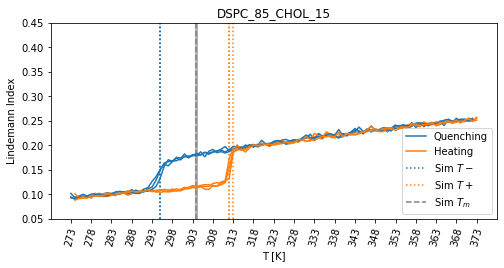

In [37]:
base = 'DSPC_{0}_{1}_{2}_box_15_15_rep'.format(85, 'CHOL', 15)
name = 'DSPC_{0}_{1}_{2}'.format(85, 'CHOL', 15)
TM, TM_err = calc_plot_TM (base, name)

[291.0, 293.0, 291.0] [323.0, 319.0, 330.0]
TM:  308.25814368787877 2.976973921203294
291.6666666666667 1.1547005383792517
324.0 5.5677643628300215


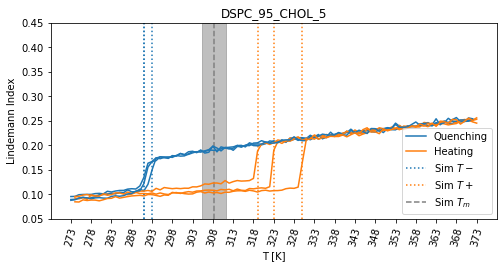

In [28]:
base = 'DSPC_{0}_{1}_{2}_box_15_15_rep'.format(95, 'CHOL', 5)
name = 'DSPC_{0}_{1}_{2}'.format(95, 'CHOL', 5)
TM, TM_err = calc_plot_TM (base, name)


[291.0, 293.0, 291.0] [323.0, 319.0, 330.0]
TM:  308.25814368787877 2.976973921203294
291.6666666666667 1.1547005383792517
324.0 5.5677643628300215


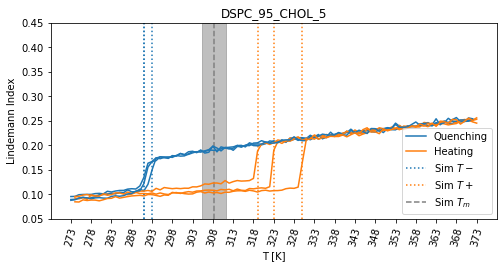

[287.0, 288.0, 287.0] [328.0, 318.0, 331.0]
TM:  307.0998710544749 3.620087366297116
287.3333333333333 0.5773502691896258
325.6666666666667 6.8068592855540455


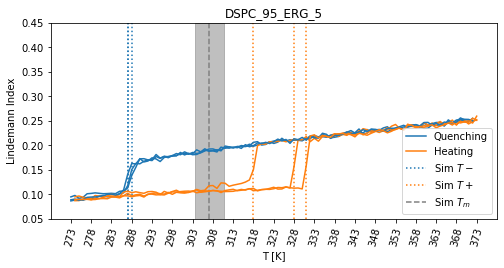

[289.0, 289.0, 290.0] [321.0, 313.0, 314.0]
TM:  302.96049504699954 2.2900878000380605
289.3333333333333 0.5773502691896258
316.0 4.358898943540674


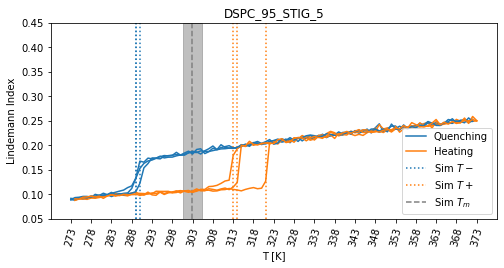

[292.0, 292.0, 290.0] [324.0, 321.0, 320.0]
TM:  306.87547922091863 1.221022497718732
291.3333333333333 1.1547005383792517
321.6666666666667 2.0816659994661326


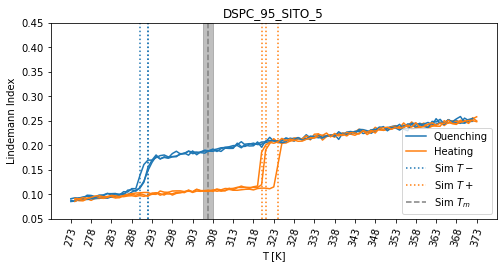

[292.0, 289.0, 290.0] [320.0, 325.0, 321.0]
TM:  306.57634922122287 1.5665277687484653
290.3333333333333 1.5275252316519465
322.0 2.6457513110645907


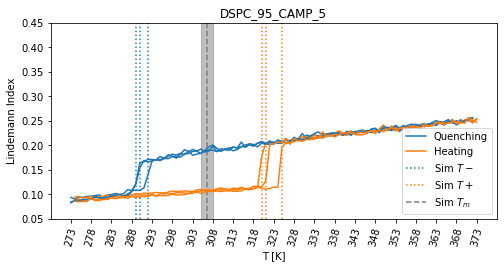

[295.0, 293.0, 294.0] [316.0, 316.0, 317.0]
TM:  305.37104058224577 0.5666888883244273
294.0 1.0
316.3333333333333 0.5773502691896258


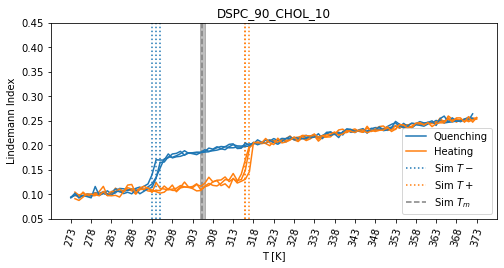

[290.0, 291.0, 290.0] [308.0, 310.0, 307.0]
TM:  299.46866459371756 0.8347057855576036
290.3333333333333 0.5773502691896258
308.3333333333333 1.5275252316519465


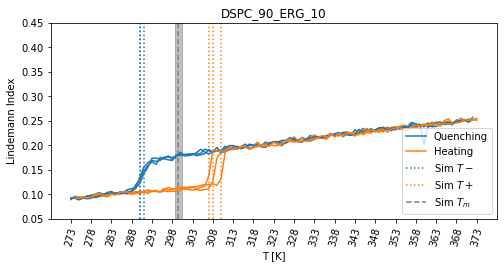

[289.0, 288.0, 287.0] [306.0, 368.0, 304.0]
TM:  307.5885119647111 19.29227908533501
288.0 1.0
326.0 36.38681079732051


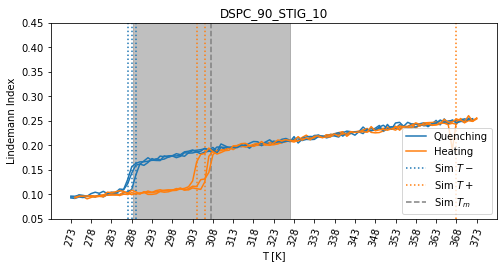

[290.0, 289.0, 289.0] [308.0, 307.0, 304.0]
TM:  297.9546507109037 1.106230512976825
289.3333333333333 0.5773502691896258
306.3333333333333 2.0816659994661326


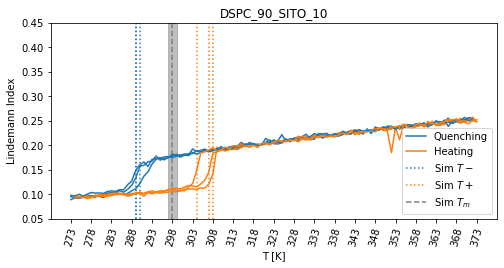

[290.0, 293.0, 290.0] [312.0, 316.0, 310.0]
TM:  302.0278097533042 1.78801373849228
291.0 1.7320508075688772
312.6666666666667 3.055050463303893


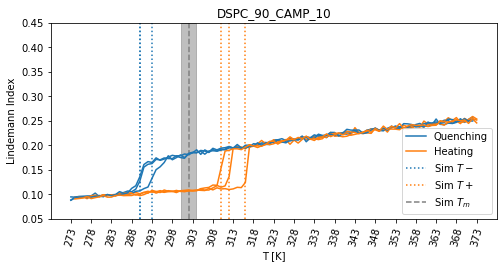

In [38]:
sterols     = ['CHOL','ERG','STIG','SITO','CAMP']
conc_DSPC   = ['95','90']
conc_sterol = ['5','10']

TMs = {}

for idx, conc in enumerate(conc_sterol):
    for sterol in sterols:
        conc_pc = conc_DSPC[idx]
        base = 'DSPC_{0}_{1}_{2}_box_15_15_rep'.format(conc_pc, sterol, conc)
        name = 'DSPC_{0}_{1}_{2}'.format(conc_pc, sterol, conc)
        TM, TM_err = calc_plot_TM (base, name)
        TMs[name] = [TM, TM_err]

In [39]:
TMs

{'DSPC_95_CHOL_5': [308.25814368787877, 2.976973921203294],
 'DSPC_95_ERG_5': [307.0998710544749, 3.620087366297116],
 'DSPC_95_STIG_5': [302.96049504699954, 2.2900878000380605],
 'DSPC_95_SITO_5': [306.87547922091863, 1.221022497718732],
 'DSPC_95_CAMP_5': [306.57634922122287, 1.5665277687484653],
 'DSPC_90_CHOL_10': [305.37104058224577, 0.5666888883244273],
 'DSPC_90_ERG_10': [299.46866459371756, 0.8347057855576036],
 'DSPC_90_STIG_10': [307.5885119647111, 19.29227908533501],
 'DSPC_90_SITO_10': [297.9546507109037, 1.106230512976825],
 'DSPC_90_CAMP_10': [302.0278097533042, 1.78801373849228]}

In [40]:
exp = pd.read_csv('Curve_CHOL_DSPC.csv')

In [41]:
Exp = np.array(exp)

CHOL 5 308.25814368787877 2.976973921203294
ERG 5 307.0998710544749 3.620087366297116
STIG 5 302.96049504699954 2.2900878000380605
SITO 5 306.87547922091863 1.221022497718732
CAMP 5 306.57634922122287 1.5665277687484653
CHOL 10 305.37104058224577 0.5666888883244273
ERG 10 299.46866459371756 0.8347057855576036
STIG 10 307.5885119647111 19.29227908533501
SITO 10 297.9546507109037 1.106230512976825
CAMP 10 302.0278097533042 1.78801373849228


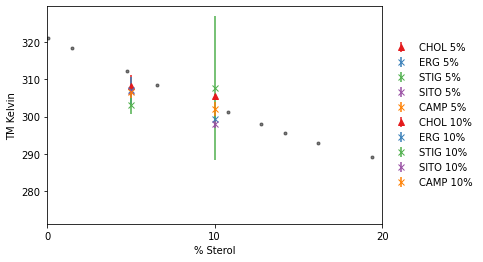

In [56]:
color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00', '#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
plt.plot(Exp[:,0], Exp[:,1]+273.15, '.', alpha=0.5, color='black')
plt.xlabel('% Sterol')
plt.ylabel('TM Kelvin')
plt.xticks([0,10,20,30,40,50,60])

for idx, key in enumerate(TMs.keys()):
    ST = key.split('_')[-2] 
    Conc_ST = key.split('_')[-1]
    TM, err = TMs[key]
    print ( ST, Conc_ST, TM, err)
    if ST=='CHOL':
        ms = '^'
    else:
        ms = 'x'
    plt.errorbar(int(Conc_ST), TM, yerr=err, fmt=ms, label=f'{ST} {Conc_ST}%', color=color_list[idx], ecolor=color_list[idx])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.xlim(0,20)

plt.savefig('TMs_Calc_vs_Exp_Err.png', dpi=300, bbox_inches='tight') 

CHOL 5 308.25814368787877 2.976973921203294
ERG 5 307.0998710544749 3.620087366297116
STIG 5 302.96049504699954 2.2900878000380605
SITO 5 306.87547922091863 1.221022497718732
CAMP 5 306.57634922122287 1.5665277687484653
CHOL 10 305.37104058224577 0.5666888883244273
ERG 10 299.46866459371756 0.8347057855576036
STIG 10 307.5885119647111 19.29227908533501
SITO 10 297.9546507109037 1.106230512976825
CAMP 10 302.0278097533042 1.78801373849228


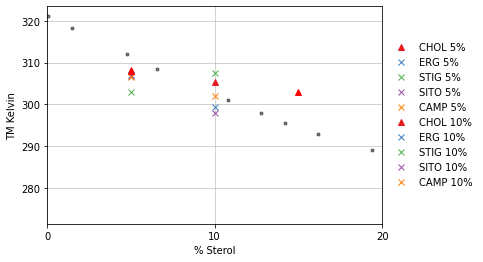

In [52]:
color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00', '#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']
plt.plot(Exp[:,0], Exp[:,1]+273.15, '.', alpha=0.5, color='black')
plt.xlabel('% Sterol')
plt.ylabel('TM Kelvin')
plt.xticks([0,10,20,30,40,50,60])

for idx, key in enumerate(TMs.keys()):
    ST = key.split('_')[-2] 
    Conc_ST = key.split('_')[-1]
    TM, err = TMs[key]
    print ( ST, Conc_ST, TM, err)
    if ST=='CHOL':
        ms = '^'
    else:
        ms = 'x'
    plt.errorbar(int(Conc_ST), TM, fmt=ms, label=f'{ST} {Conc_ST}%', color=color_list[idx], ecolor='grey')
plt.errorbar(5, 308, fmt='^', color='red')
plt.errorbar(15, 303, fmt='^', color='red')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

plt.xlim(0,20)

plt.grid(alpha=0.7)

plt.savefig('TMs_Calc_vs_Exp.png', dpi=300, bbox_inches='tight') 

In [46]:
pwd

'/data2/lisbeth_is_awesome/STEROLS/TMs'